In [ ]:
#download dataset before run
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna
from scipy.stats import norm
import seaborn as sns
sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
#show part of the data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
num_rows = len(dataset)
num_columns = len(dataset.columns)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 768
Number of columns: 9


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
duplicates = dataset.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [ ]:
print("Missing values:")
dataset.isnull().sum()


Missing values:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


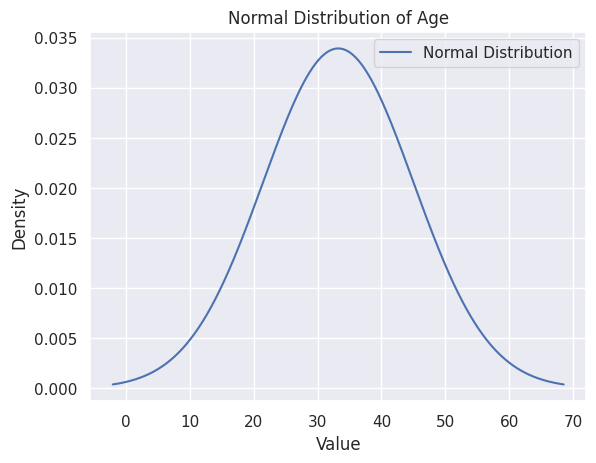

In [ ]:
mean_Age = dataset['Age'].mean()
std_dev = dataset['Age'].std()

x = np.linspace(mean_Age - 3*std_dev, mean_Age + 3*std_dev, 1000)


pdf = norm.pdf(x, mean_Age, std_dev)
plt.plot(x, pdf, label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution of Age')
plt.legend()
plt.show()

In [ ]:
mean_Glucose = dataset['Glucose'].mean()
print("The average is ", mean_Glucose)

The average is  120.89453125


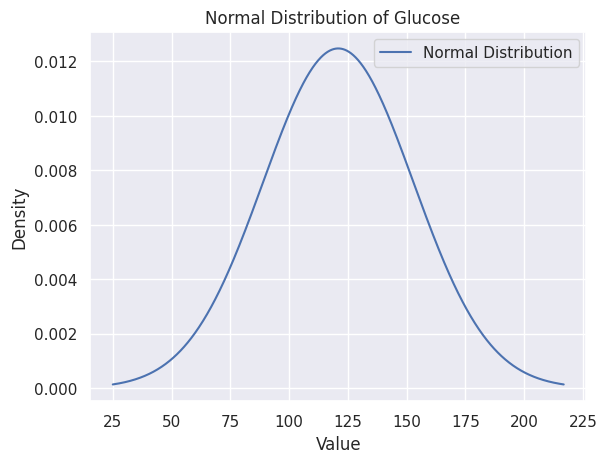

In [ ]:
mean_Glucose = dataset['Glucose'].mean()
std_dev = dataset['Glucose'].std()

x = np.linspace(mean_Glucose - 3*std_dev, mean_Glucose + 3*std_dev, 1000)


pdf = norm.pdf(x, mean_Glucose, std_dev)
plt.plot(x, pdf, label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution of Glucose  ')
plt.legend()
plt.show()

In [ ]:
mean_BMI = dataset['BMI'].mean()
print("The average is ", mean_BMI)

The average is  31.992578124999998


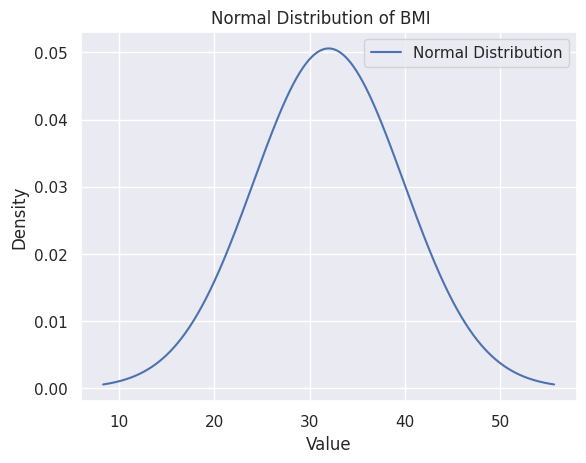

In [ ]:
mean_BMI= dataset['BMI'].mean()
std_dev = dataset['BMI'].std()

x = np.linspace(mean_BMI - 3*std_dev, mean_BMI + 3*std_dev, 1000)


pdf = norm.pdf(x, mean_BMI , std_dev)
plt.plot(x, pdf, label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution of BMI   ')
plt.legend()
plt.show()

In [ ]:
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace = True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace = True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace = True)

<ipython-input-14-443fbe650f9c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)
<ipython-input-14-443fbe650f9c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

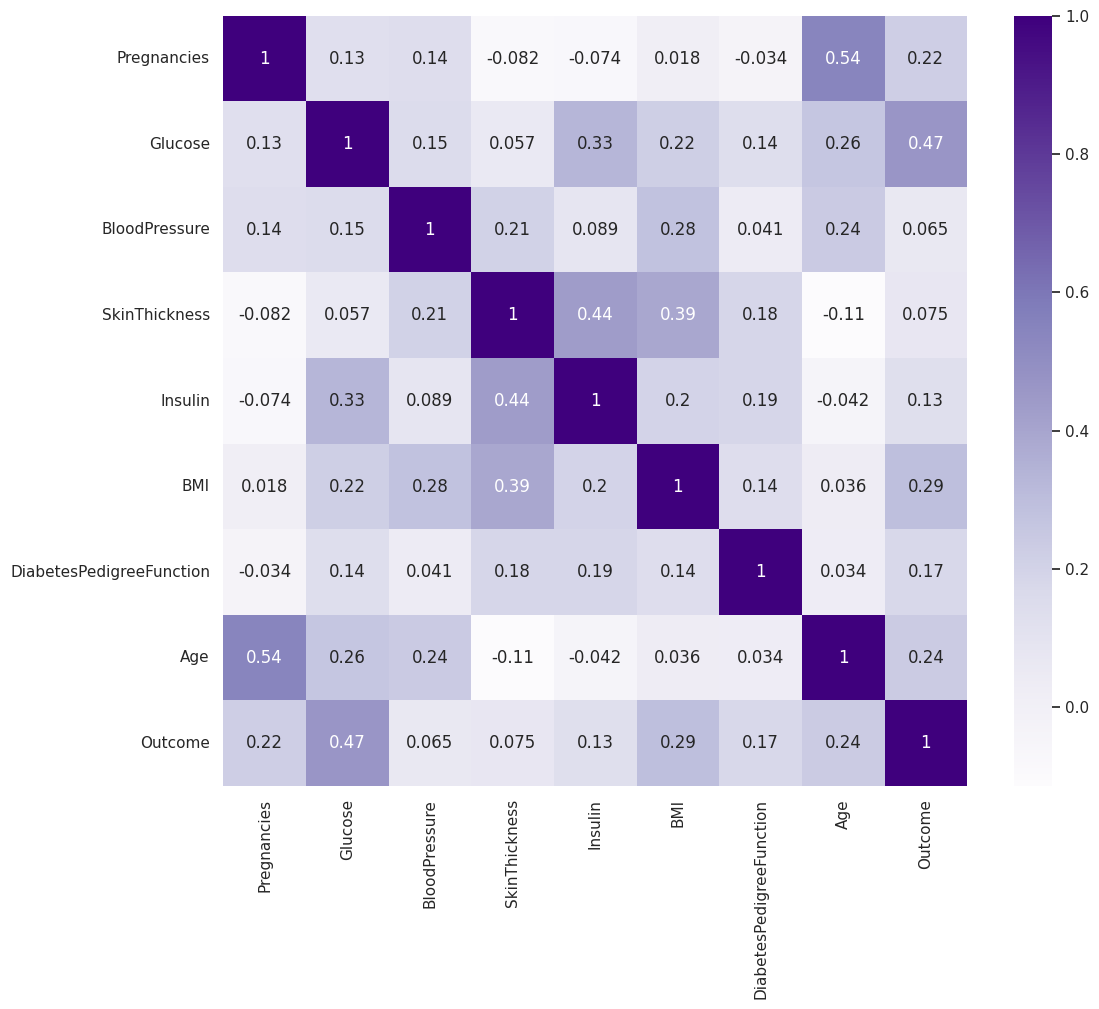

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(dataset.corr(),annot=True,cmap = 'Purples')

Outcome
0    500
1    268
Name: count, dtype: int64


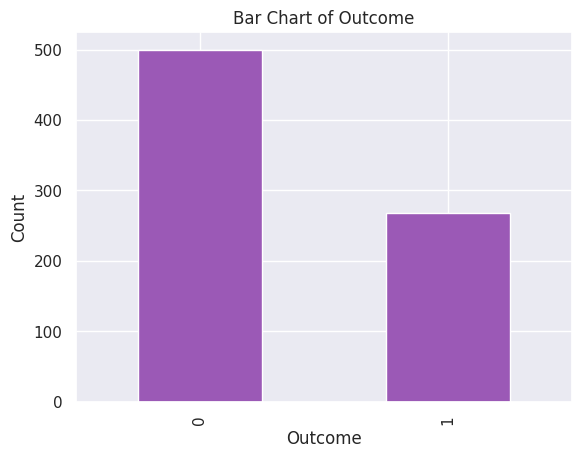

In [ ]:
color_wheel = {1: "#9b59b6",
               2: "#9b59b6"}

colors = dataset["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(dataset.Outcome.value_counts())
p = dataset.Outcome.value_counts().plot(kind="bar", color="#9b59b6")
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Bar Chart of Outcome')
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


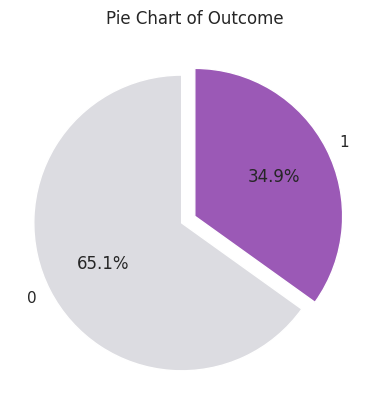

In [ ]:
color_wheel = {1: "#9b59b6",
               2: "#dcdce1"}
colors = dataset["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(dataset.Outcome.value_counts())
p = dataset.Outcome.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.1, 0)
)
plt.ylabel('')
plt.title('Pie Chart of Outcome')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 0:8]
y = dataset.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=30
)

In [ ]:
# check the shape of X_train and X_test
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train,y_train)

# Predict Output
# Use .iloc to access the row by position
predicted = model.predict(X_test.iloc[[6]])

print("Actual Value:", y_test.iloc[6])
print("Predicted Value:", predicted[0])

Actual Value: 1
Predicted Value: 1


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7792207792207793
F1 Score: 0.7847313716878934


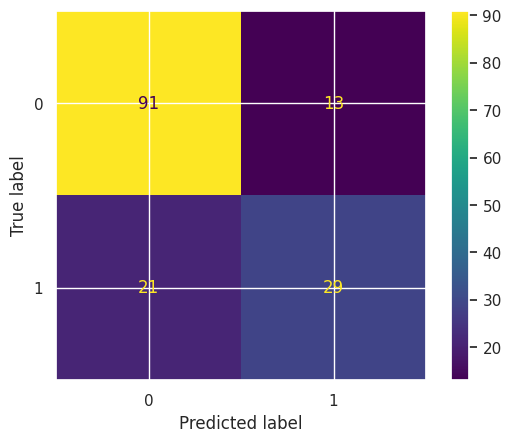

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 0:8]
y = dataset.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=30
)


In [ ]:
# check the shape of X_train and X_test
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
# Use .iloc to access the row by position
predicted = model.predict(X_test.iloc[[6]])

print("Actual Value:", y_test.iloc[6])
print("Predicted Value:", predicted[0])


Actual Value: 1
Predicted Value: 1


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7916666666666666
F1 Score: 0.7957411219763252


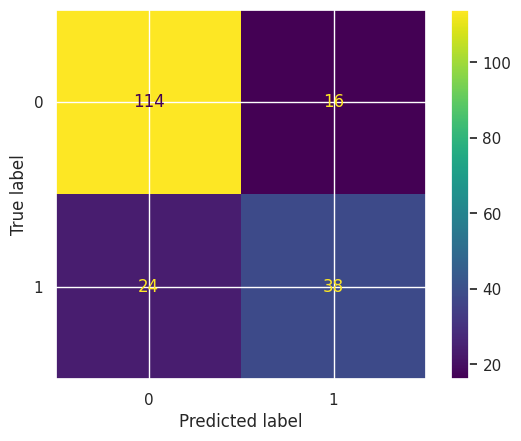

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()